In [4]:
!pip install elevation
!pip install richdem
!pip install pysheds

     |████████████████████████████████| 71kB 2.7MB/s 
ERROR: pip-tools 4.5.1 has requirement click>=7, but you'll have click 6.7 which is incompatible.
  Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
     |████████████████████████████████| 4.5MB 6.1MB/s 
     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 6.5MB 6.5MB/s 
     |████████████████████████████████| 18.3MB 246kB/s 
  Created wheel for pysheds: filename=pysheds-0.2.7-cp36-none-any.whl size=51838 sha256=c0d121b660297974f1bbc6845339b53032e8535b03d7c60bde0e21c9f26d8b36
  Stored in directory: /root/.cache/pip/wheels/e4/87/6f/f67cbfbc39ea2c76e0cb801c37590b9e3c47e9eee7baea2547
Successfully built pysheds


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import elevation
import richdem as rd

In [7]:
shasta_dem = rd.LoadGDAL('/content/drive/MyDrive/Geoinformatics/Project1/Dataset/Patna left.tif')

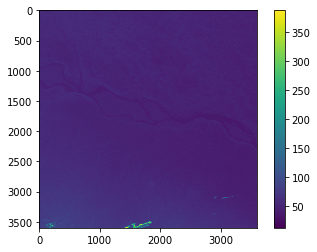

In [8]:
plt.imshow(shasta_dem, interpolation='none')
plt.colorbar()
plt.show()

Finding the SLOPE

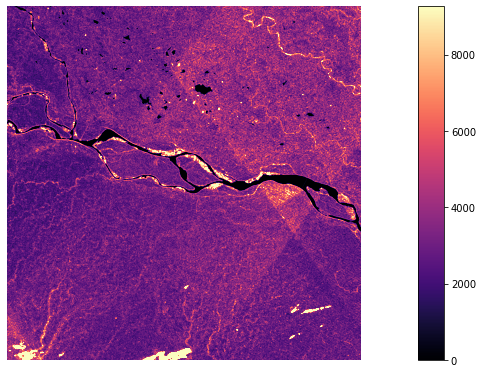

In [9]:
slope = rd.TerrainAttribute(shasta_dem, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()

Findinf the Aspect

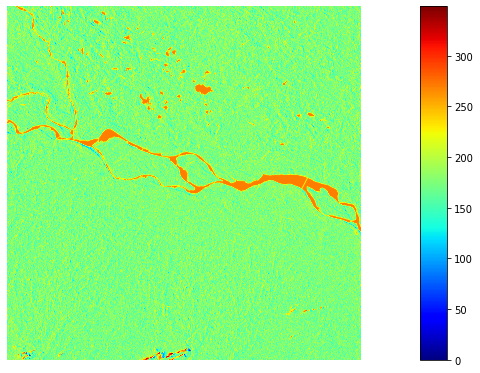

In [10]:
aspect = rd.TerrainAttribute(shasta_dem, attrib='aspect')
rd.rdShow(aspect, axes=False, cmap='jet', figsize=(8, 5.5))
plt.show()

Finding the Flow Accumulation.

/usr/local/lib/python3.6/dist-packages/richdem/__init__.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


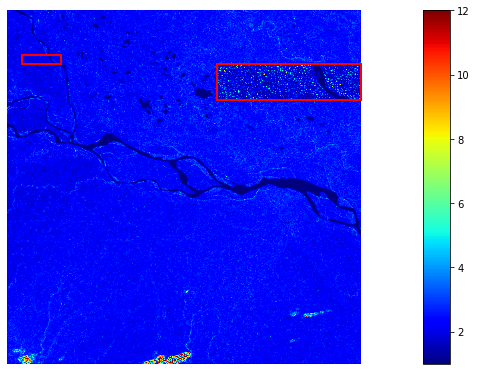

In [11]:
accum = rd.FlowAccumulation(shasta_dem , method='D8' , in_place=True)

d8_fig = rd.rdShow(accum, zxmin=150, zxmax=550, zymin=550, zymax=450, figsize=(8,5.5), axes=False, cmap='jet')

[  0. 255.]


NameError: ignored

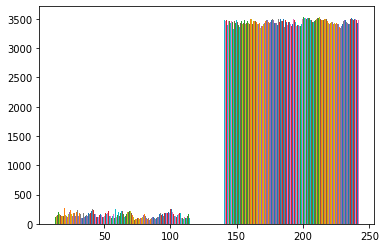

In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
arr = np.array(slope)
for i, x in enumerate(arr):
  for j, y in enumerate(x):
    #print(arr[i][j])
    if y <15 :
      arr[i][j] = 0
    else:
      arr[i][j] = 255  
plt.hist(arr,bins=2)
print(np.unique(arr))
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(arr,cmap='binary')


In [ ]:
import cv2
colored_image = cv2.cvtColor(arr,cv2.COLOR_GRAY2RGB) 
plt.imshow(colored_image)
image = cv2.circle(colored_image, (650, 1300), radius=50, color=(255, 0, 0), thickness=5)
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(image)

In [ ]:
arr = np.array(slope)
for i, x in enumerate(arr):
  for j, y in enumerate(x):
    #print(arr[i][j])
    if y <15 :
      arr[i][j] = 0
    else:
      arr[i][j] = 1
np.unique(arr)

In [ ]:
np.unique

In [ ]:
from skimage.morphology import skeletonize
from skimage.util import invert


image = invert(arr.copy())
skeleton = skeletonize(image.astype(int))
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(skeleton, cmap = 'gray')

In [ ]:
import matplotlib.pyplot as plt
from skimage import img_as_bool
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.morphology import skeletonize, binary_closing


im = img_as_bool(rgb2gray(image))
out = binary_closing(skeletonize(im))

f, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(im, cmap='gray', interpolation='nearest')
ax1.imshow(out, cmap='gray', interpolation='nearest')
plt.show()

In [ ]:
print(im)

In [ ]:
(thresh, blackAndWhiteImage) = cv2.threshold(image, 127, , cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage)

In [ ]:
from skimage.morphology import skeletonize
img8 = (arr/255)
skeleton = skeletonize(img8)
plt.imshow(skeleton)

In [ ]:
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(skeleton, cmap ='binary')

In [ ]:
for i, row in enumerate(arr):
  for j, col in enumerate(row):
    if 

In [ ]:
import cv2 as cv
img = np.array(arr, dtype = np.uint8)
r,threshold = cv.threshold(img,5 , 255,cv.THRESH_BINARY_INV)



In [ ]:
accum[1]

In [ ]:
np.unique((np.array(accum)))
unique, counts = np.unique((np.array(accum)), return_counts=True)
dict(zip(unique, counts))

In [ ]:
plt.hist(np.array(accum))

In [ ]:
[(np.array(accum.ravel()).unique)].count()

In [ ]:
x=plt.hist(accum.flatten(), bins=256)

In [ ]:
import cv2 as cv
img = np.array(accum, dtype = np.uint16)
r,threshold = cv.threshold(img,5 , 255,cv.THRESH_BINARY_INV)
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(threshold,cmap='binary')

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

cv.imwrite('color_img.jpg', accum)
img = cv.imread('color_img.jpg',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
from osgeo import gdal
filename = "/content/Patna left.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

In [ ]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 100)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contourf(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 500)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
print(slope)